In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 45
min later the temperature is 80$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

**1.** Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [2]:
T1 = 85
T2 = 80
Ta = 65
dt = 0.75

K = -(T2 - T1) / (dt*(T2-Ta))

print('The value of the empirical constant K = {:3.2f} 1/hrs'.format(K))

The value of the empirical constant K = 0.44 1/hrs


**2.** Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [3]:
def constK(T1, T2, Ta, dt):
    '''Calculates the emperical constant for Newton's law of Cooling
    -------------
    Input:
    T1-> starting temp
    T2-> ending temp
    Ta-> Ambient temperature value
    dt-> the time it takes to get from T1 to T2
    
    Output:
    returns the value of the emperical constant K = -(T2-T1)/(dt*(T2-Ta))
    '''
    
    return -(T2 - T1) / (dt*(T2-Ta))

In [4]:
K = constK(T1, T2, Ta, dt)
print(K)

0.4444444444444444


**3.** A first-order thermal system has the following analytical solution, 

$T(t) =T_a+(T(0)-T_a)e^{-Kt}$

where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

b. What is the final temperature as t$\rightarrow\infty$?

c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

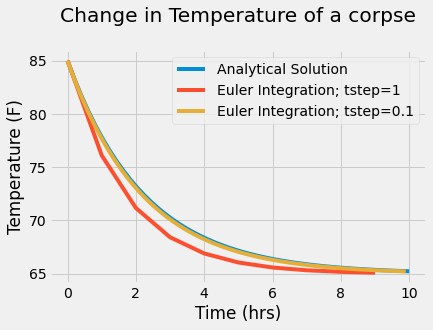

In [5]:
T0 = 85
T1 = 80
Ta = 65
dt = 0.75
K = constK(T0, T1, Ta, dt)

t_a = np.linspace(0,10,50)
t_e = np.arange(0,10,1)
t_e2 = np.arange(0,10,0.1)


def thermalAna(t, T0, Ta, K):
    '''Analytical Solution for a first-order thermal system
    -----------------
    Input:
    t-> array of time values
    T0-> Initial value for temperature
    Ta-> Ambient temperature value
    K-> emperical constant
    
    Output: 
    1D numpy array of the analytical solution: Ta + (T0-Ta)*np.exp(-K*t)
    '''
    
    return Ta + (T0-Ta)*np.exp(-K*t)

def thermalEul(t, T0, Ta, K, tstep):
    '''Computational Solution derived using Euler Integration
    ---------------
    Input:
    t-> array of time values
    T0-> Initial value for temperature
    Ta-> Ambient temperature value
    K-> emperical constant
    tstep-> step size through the integration method
    
    Output:
    1D numpy array of a computational solution for dT/dt = -K(T-Ta)
    '''
    
    T_euler = np.zeros(len(t))
    T_euler[0] = T0
    for i in range(1,len(t)):
        T_euler[i] = T_euler[i-1] + (-K)*(T_euler[i-1] - Ta)*tstep
        
    return T_euler

T_analytical = thermalAna(t_a, T0, Ta, K)
T_euler = thermalEul(t_e, T0, Ta, K, tstep=1)
T_euler2 = thermalEul(t_e2, T0, Ta, K, tstep=0.1)

plt.plot(t_a, T_analytical, label='Analytical Solution')
plt.plot(t_e, T_euler, label='Euler Integration; tstep=1')
plt.plot(t_e2, T_euler2, label='Euler Integration; tstep=0.1')
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (F)')
plt.title('Change in Temperature of a corpse\n')
plt.legend()
plt.show()

As you can see above, the solution given from the euler integration method converges pretty quickly to the analytical solution when reducing the time step by a factor of 10. You can just barely see the analytical solution under the euler integration graph when the time step is 0.1. with this knowledge gained, we can safely predict the time of death of the corpse by relying on the analytical solution to solve for when the body is at a normal body temperature of 98.6 degrees Fahrenheit.

In [6]:
t = np.linspace(-2,20,1000)
corpseT = thermalAna(t,T0, Ta, K)

print(r'The temp of the corpse converges at T = {:3.1f} degrees F'.format(corpseT[-1]))

The temp of the corpse converges at T = 65.0 degrees F


This makes sense because the body would eventually reach thermal equilibrium with the ambient environment.

In [7]:
t = np.arange(-2,0,0.01)
corpseT = thermalAna(t,T0, Ta, K)

for i,temp in enumerate(corpseT):
    if temp<99 and temp>98:
        print(i, t[i], temp)

81 -1.1899999999999993 98.94091308777514
82 -1.1799999999999993 98.79039930798822
83 -1.1699999999999993 98.6405529939777
84 -1.1599999999999993 98.49137118581153
85 -1.1499999999999992 98.34285093668367
86 -1.1399999999999992 98.19498931285602
87 -1.1299999999999992 98.04778339360031


The time of death for this corpse was about 1.17 hours before the time of discovery of 11:00am. The time of death would be about 9:50am, which is when the analytical solution has the body temperature be roughly 98.6 degrees Fahrenheit.